# 6.7 Analyzing Chocolate Sales Data

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### 5. The elbow technique
#### 6. K-means clustering
#### 7. Time series analysis: decomposition
#### 8. Testing for stationarity
#### 9. Stationarizing the Chocolate sales Data
#### 10. Plotting a Choropleth map
#### 11. Saving datasets

## 1. Importing libraries and data

In [523]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import folium
import json
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans # Here is where k-means algorithm is imported from scikit.learn
import pylab as pl # Pylab is a convenience module that bulk imports matplotlib
import statsmodels.api as sm # Using .api imports the public access version of the statsmodels, which is a library the handles 
# statistical models
import warnings # This is a library that handles warnings

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended Library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how the plots will appear. More examples here:

In [524]:
# This option ensures charts/graphs created are displayed in this notebook without the need to "call" call the specifically

%matplotlib inline

In [525]:
path = r'C:\Users\terry\Documents\Data Analytics Course\Achievement 6'

In [526]:
df = pd.read_csv(os.path.join(path, 'Original Data', 'Chocolate_Sales.csv')) 

In [527]:
df.shape

(1094, 6)

In [528]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [529]:
df.columns

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount',
       'Boxes Shipped'],
      dtype='object')

In [530]:
# Dictionary mapping table names to GeoDataFrame names

country_mapping = {
    "USA": "United States of America",
    "UK": "United Kingdom",
    }

# Applying the mapping to the table

df["Country"] = df["Country"].replace(country_mapping)


In [531]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,United Kingdom,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,United Kingdom,Peanut Butter Cubes,24-Feb-22,"$13,685",184


## 2. Data Cleaning

In [532]:
# Cleaning Column names: Column names contain extra spaces, these should be stripped and standardized

df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

In [533]:
df.head()

,sales_person,country,product,date,amount,boxes_shipped
0,Jehu Rudeforth,United Kingdom,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,United Kingdom,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [534]:
# Converting 'date' column to datetime format - it's currently an object (string)

df["date"] = pd.to_datetime(df["date"], format="%d-%b-%y")

In [535]:
# amount column has currency symbol and it is stored as an object 
# Cleaning 'amount' column (remove '$' and convert to float)

df["amount"] = df["amount"].replace(r"[\$,]", "", regex=True).astype(float)

In [536]:
# Displaying cleaned dataset info

df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sales_person   1094 non-null   object        
 1   country        1094 non-null   object        
 2   product        1094 non-null   object        
 3   date           1094 non-null   datetime64[ns]
 4   amount         1094 non-null   float64       
 5   boxes_shipped  1094 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 51.4+ KB


(None,
      sales_person         country              product       date   amount  \
 0  Jehu Rudeforth  United Kingdom      Mint Chip Choco 2022-01-04   5320.0   
 1     Van Tuxwell           India        85% Dark Bars 2022-08-01   7896.0   
 2    Gigi Bohling           India  Peanut Butter Cubes 2022-07-07   4501.0   
 3    Jan Morforth       Australia  Peanut Butter Cubes 2022-04-27  12726.0   
 4  Jehu Rudeforth  United Kingdom  Peanut Butter Cubes 2022-02-24  13685.0   
 
    boxes_shipped  
 0            180  
 1             94  
 2             91  
 3            342  
 4            184  )

In [537]:
# Checking for missing values

df.isnull().sum()

# No Missing values

sales_person     0
country          0
product          0
date             0
amount           0
boxes_shipped    0
dtype: int64

In [538]:
# Checking for duplicates

dups = df.duplicated().sum()

# No Duplicates

In [539]:
dups

0

In [540]:
df.describe()

,date,amount,boxes_shipped
count,1094,1094.000000,1094.000000
mean,2022-05-03 09:04:56.160877568,5652.308044,161.797989
min,2022-01-03 00:00:00,7.000000,1.000000
25%,2022-03-02 00:00:00,2390.500000,70.000000
50%,2022-05-11 00:00:00,4868.500000,135.000000
75%,2022-07-04 00:00:00,8027.250000,228.750000
max,2022-08-31 00:00:00,22050.000000,709.000000
std,NaN,4102.442014,121.544145


In [541]:
# Checking for extreme values (outliers) in 'amount' and 'boxes_shipped' using the IQR method

Q1 = df[['amount', 'boxes_shipped']].quantile(0.25)
Q3 = df[['amount', 'boxes_shipped']].quantile(0.75)
IQR = Q3 - Q1

# Defining outlier thresholds

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers

outliers = ((df[['amount', 'boxes_shipped']] < lower_bound) | (df[['amount', 'boxes_shipped']] > upper_bound)).sum()

In [542]:
outliers

amount           16
boxes_shipped    26
dtype: int64

I will prefer to cap the outliers at the lower and upper bounds to maintain reasonable values while avoiding skewed data. It should however be noted that Some transactions may have simply involved extremely low value or extremely high-value sales likewise number of boxes shipped may have been unusually high or fewer than typical orders.

In [543]:
# Capping outliers at the upper bound

df[['amount', 'boxes_shipped']] = df[['amount', 'boxes_shipped']].clip(lower=lower_bound, upper=upper_bound, axis=1)

In [544]:
# Verifying the handling of extreme values

df.describe()

,date,amount,boxes_shipped
count,1094,1094.000000,1094.000000
mean,2022-05-03 09:04:56.160877568,5624.851920,160.185329
min,2022-01-03 00:00:00,7.000000,1.000000
25%,2022-03-02 00:00:00,2390.500000,70.000000
50%,2022-05-11 00:00:00,4868.500000,135.000000
75%,2022-07-04 00:00:00,8027.250000,228.750000
max,2022-08-31 00:00:00,16482.375000,466.875000
std,NaN,4019.006061,116.518274


In [545]:
df.head()

,sales_person,country,product,date,amount,boxes_shipped
0,Jehu Rudeforth,United Kingdom,Mint Chip Choco,2022-01-04,5320.0,180.0
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94.0
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91.0
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342.0
4,Jehu Rudeforth,United Kingdom,Peanut Butter Cubes,2022-02-24,13685.0,184.0


In [546]:
# Grouping data by 'product' and summarizing key statistics

grouped_by_product = df.groupby("product").agg(
    total_sales=("amount", "sum"),
    avg_sales=("amount", "mean"),
    total_boxes=("boxes_shipped", "sum"),
    avg_boxes=("boxes_shipped", "mean"),
    transactions=("product", "count")
).reset_index()

# Display grouped data

grouped_by_product

,product,total_sales,avg_sales,total_boxes,avg_boxes,transactions
0,50% Dark Bites,341712.000,5695.200000,9550.875,159.181250,60
1,70% Dark Bites,211610.000,5038.333333,7874.750,187.494048,42
2,85% Dark Bars,297679.375,5953.587500,7751.875,155.037500,50
3,99% Dark & Pure,299485.375,6111.946429,8127.000,165.857143,49
4,After Nines,258896.750,5177.935000,8203.875,164.077500,50
5,Almond Choco,277536.000,5782.000000,6736.000,140.333333,48
6,Baker's Choco Chips,248630.375,6064.155488,6940.875,169.289634,41
7,Caramel Stuffed Bars,231088.375,5374.148256,8412.375,195.636628,43
8,Choco Coated Almonds,241486.000,6191.948718,6464.000,165.743590,39
9,Drinking Coco,256655.000,4583.125000,8366.750,149.406250,56


In [547]:
# Sorting by 'total_sales' in descending order

sorted_by_sales = grouped_by_product.sort_values(by="total_sales", ascending=False)

# Display sorted data

sorted_by_sales

,product,total_sales,avg_sales,total_boxes,avg_boxes,transactions
19,Smooth Sliky Salty,344338.750,5836.250000,8631.375,146.294492,59
0,50% Dark Bites,341712.000,5695.200000,9550.875,159.181250,60
21,White Choc,329147.000,5674.948276,8240.000,142.068966,58
17,Peanut Butter Cubes,319274.375,6515.803571,8304.000,169.469388,49
10,Eclairs,309446.375,5157.439583,8552.750,142.545833,60
3,99% Dark & Pure,299485.375,6111.946429,8127.000,165.857143,49
2,85% Dark Bars,297679.375,5953.587500,7751.875,155.037500,50
20,Spicy Special Slims,293454.000,5434.333333,8629.750,159.810185,54
16,Organic Choco Syrup,288196.125,5542.233173,7749.000,149.019231,52
14,Mint Chip Choco,280967.750,6243.727778,8207.000,182.377778,45


In [548]:
# Resetting index after sorting
sorted_by_sales.reset_index(drop=True, inplace=True)

# Displaying updated dataframe

sorted_by_sales

,product,total_sales,avg_sales,total_boxes,avg_boxes,transactions
0,Smooth Sliky Salty,344338.750,5836.250000,8631.375,146.294492,59
1,50% Dark Bites,341712.000,5695.200000,9550.875,159.181250,60
2,White Choc,329147.000,5674.948276,8240.000,142.068966,58
3,Peanut Butter Cubes,319274.375,6515.803571,8304.000,169.469388,49
4,Eclairs,309446.375,5157.439583,8552.750,142.545833,60
5,99% Dark & Pure,299485.375,6111.946429,8127.000,165.857143,49
6,85% Dark Bars,297679.375,5953.587500,7751.875,155.037500,50
7,Spicy Special Slims,293454.000,5434.333333,8629.750,159.810185,54
8,Organic Choco Syrup,288196.125,5542.233173,7749.000,149.019231,52
9,Mint Chip Choco,280967.750,6243.727778,8207.000,182.377778,45


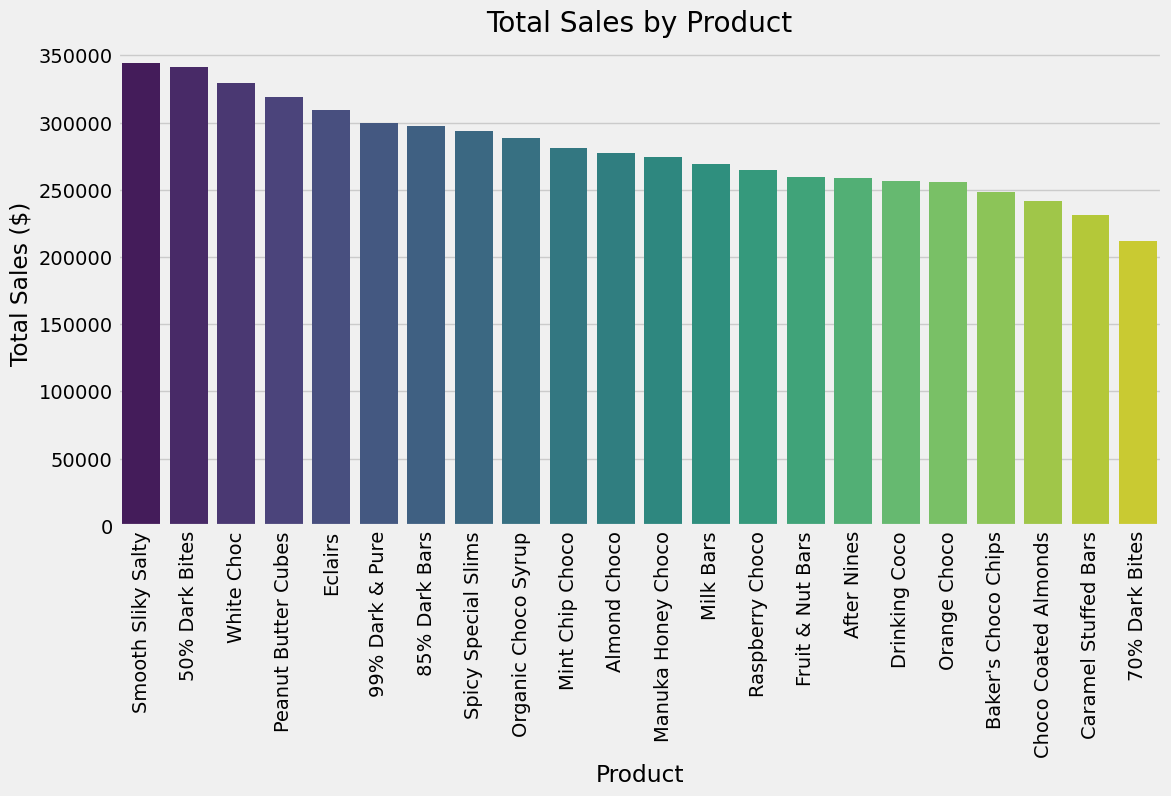

In [549]:
## A Bar chart to determine the most popular/most sold chocolate products

# Set figure size
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(data=sorted_by_sales, x="product", y="total_sales", hue="product", palette="viridis", legend=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel("Product")
plt.ylabel("Total Sales ($)")
plt.title("Total Sales by Product")

# Show the plot
plt.show()

In [550]:
# Creating a scatterplot using matplotlib for a look at how the chosen variables plot against each other.

sorted_by_sales.plot(x = 'total_sales', y='total_boxes',style='o')  # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of boxes shipped Vs Total_sales')
plt.xlabel('Total Sales')
plt.ylabel('Total number of Boxes shipped')

Text(0, 0.5, 'Total number of Boxes shipped')

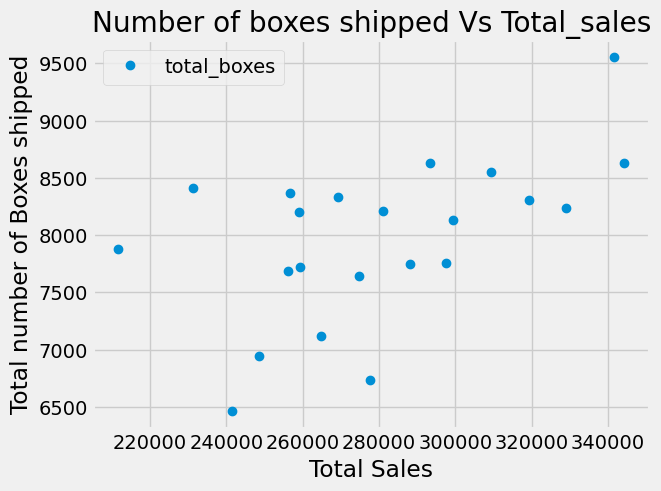

In [551]:
plt.show()

In [552]:
# Grouping by 'Country' and sum of total sales
country_sales = df.groupby('country')['amount'].sum().reset_index()

# Sorting by total sales in descending order
country_sales = country_sales.sort_values(by='amount', ascending=False)  

# Resetting index after sorting
country_sales.reset_index(drop=True, inplace=True)

country_sales

,country,amount
0,Australia,1133252.750
1,United Kingdom,1047068.750
2,United States of America,1033031.125
3,India,1032304.875
4,Canada,962368.750
5,New Zealand,945561.750


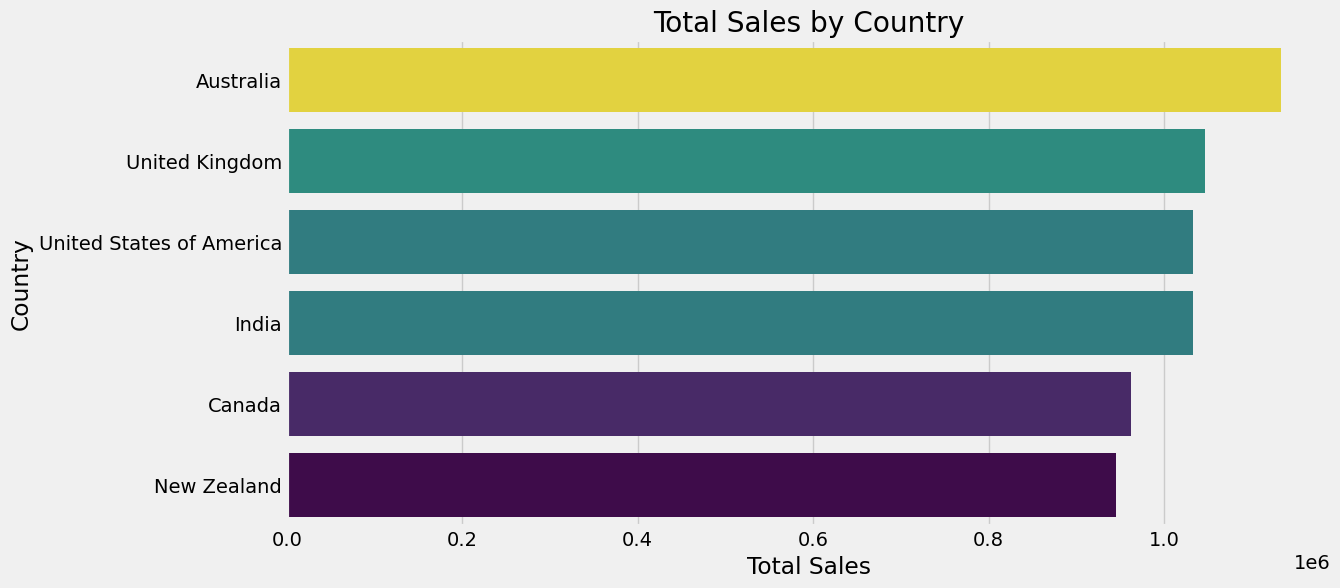

In [553]:
# A Bar chart to determine the most popular/most sold chocolate products

# Set figure size
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(data=country_sales, x="amount", y="country", hue="amount", palette="viridis", legend=False)

# Add labels and title
plt.xlabel("Total Sales")
plt.ylabel("Country")
plt.title("Total Sales by Country")

# Show the plot
plt.show()

In [554]:
# Sorting by 'total_boxes' in descending order

sorted_by_boxes = grouped_by_product.sort_values(by="total_boxes", ascending=False)

# Resetting index after sorting
sorted_by_boxes.reset_index(drop=True, inplace=True)

# Displaying updated dataframe

sorted_by_boxes.head(20)

# Display sorted data

sorted_by_boxes

,product,total_sales,avg_sales,total_boxes,avg_boxes,transactions
0,50% Dark Bites,341712.000,5695.200000,9550.875,159.181250,60
1,Smooth Sliky Salty,344338.750,5836.250000,8631.375,146.294492,59
2,Spicy Special Slims,293454.000,5434.333333,8629.750,159.810185,54
3,Eclairs,309446.375,5157.439583,8552.750,142.545833,60
4,Caramel Stuffed Bars,231088.375,5374.148256,8412.375,195.636628,43
5,Drinking Coco,256655.000,4583.125000,8366.750,149.406250,56
6,Milk Bars,269248.000,5494.857143,8330.000,170.000000,49
7,Peanut Butter Cubes,319274.375,6515.803571,8304.000,169.469388,49
8,White Choc,329147.000,5674.948276,8240.000,142.068966,58
9,Mint Chip Choco,280967.750,6243.727778,8207.000,182.377778,45


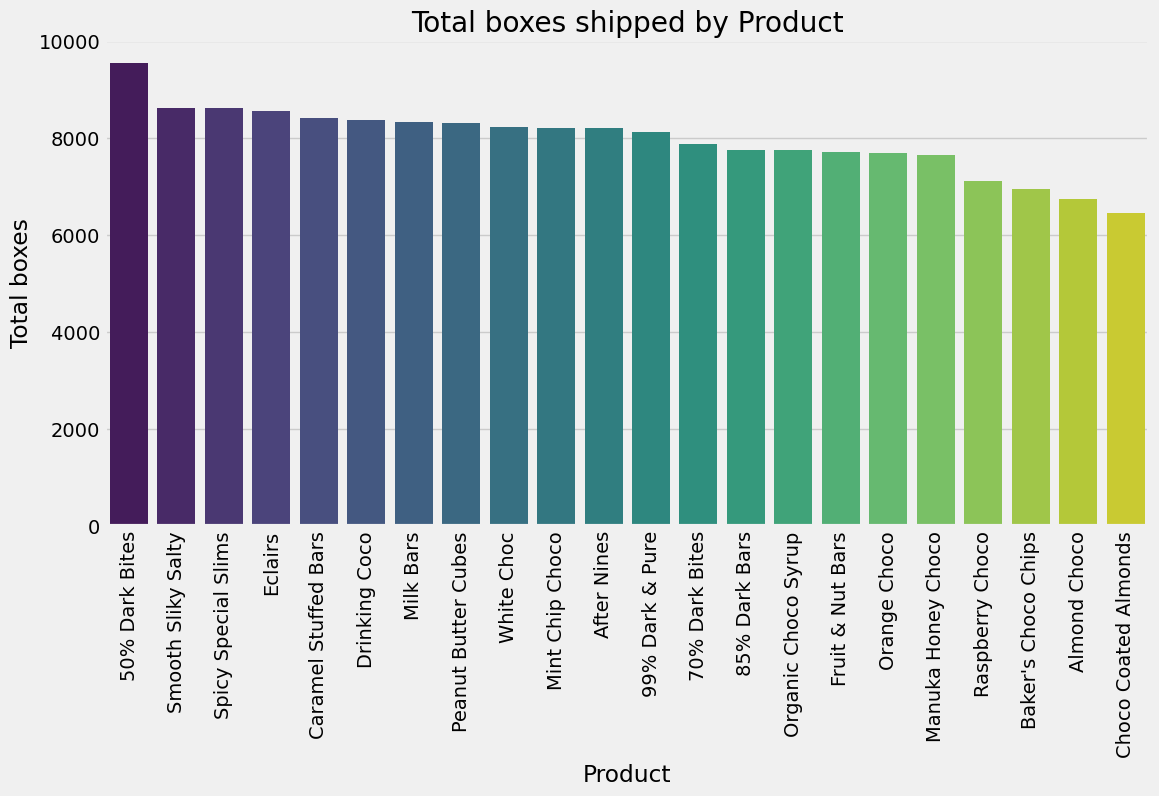

In [555]:
# A Bar chart to determine the most shipped/In-demand chocolate products

# Set figure size
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(data=sorted_by_boxes, x="product", y="total_boxes", hue="product", palette="viridis", legend=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel("Product")
plt.ylabel("Total boxes")
plt.title("Total boxes shipped by Product")

# Show the plot
plt.show()

In [556]:
# Top selling products by country

# Group by 'Product' and 'Country' to get total sales
product_country_sales = df.groupby(['product', 'country'])['amount'].sum().reset_index()

# Sort by total sales in descending order
sorted_product_country_sales = product_country_sales.sort_values(by='amount', ascending=False)

# Resetting index after sorting
sorted_product_country_sales.reset_index(drop=True, inplace=True)

# Displaying updated dataframe

sorted_product_country_sales.head(20)

,product,country,amount
0,50% Dark Bites,Australia,89222.000
1,Mint Chip Choco,New Zealand,84851.375
2,Raspberry Choco,United States of America,83524.000
3,Peanut Butter Cubes,United Kingdom,79695.000
4,99% Dark & Pure,United Kingdom,79100.000
5,Eclairs,India,79009.000
6,Spicy Special Slims,India,75495.000
7,Smooth Sliky Salty,India,73196.375
8,Smooth Sliky Salty,United Kingdom,73119.375
9,Peanut Butter Cubes,India,71341.375


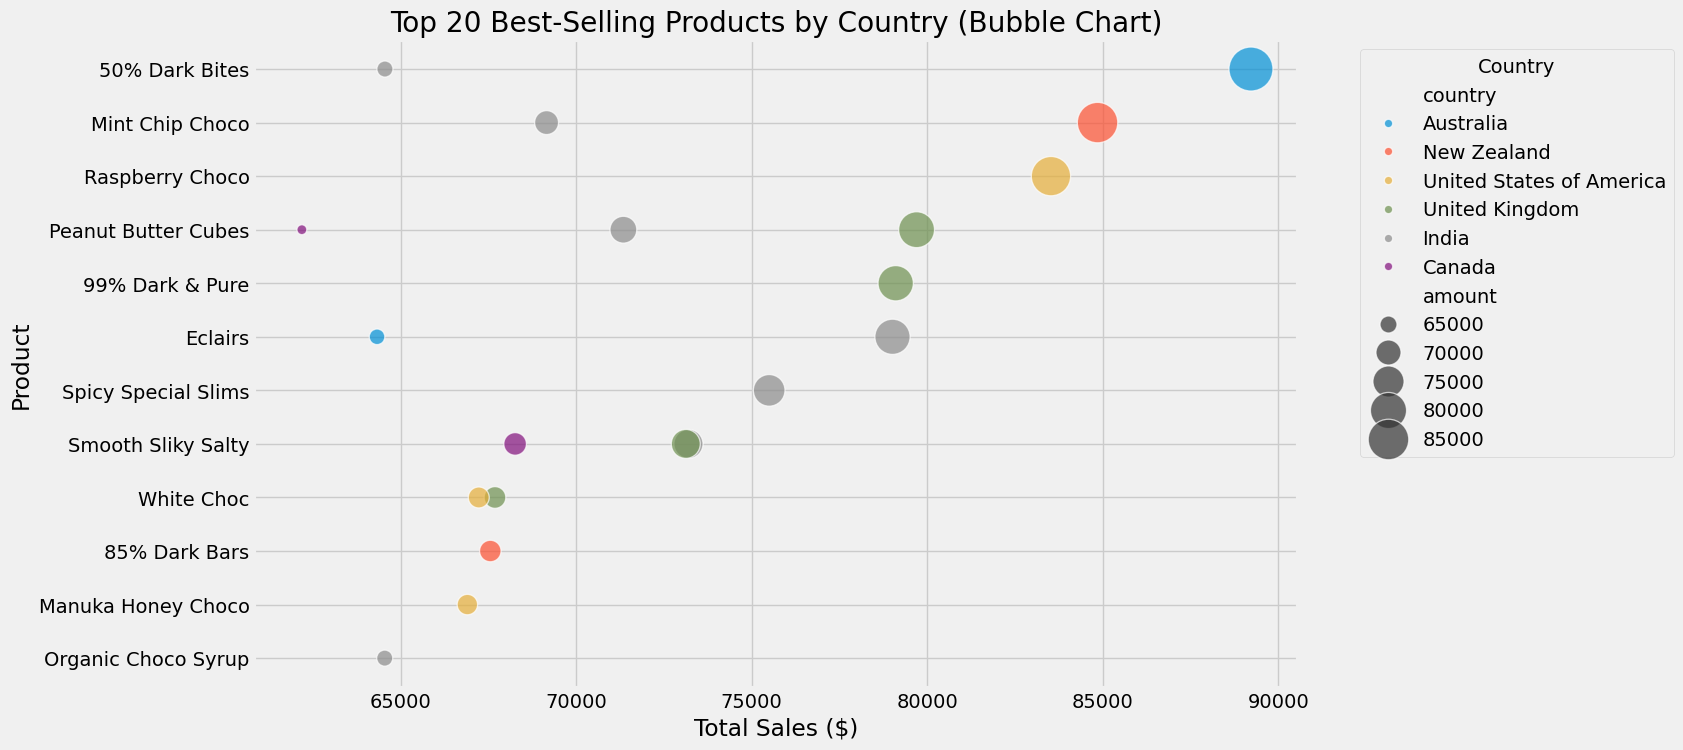

In [557]:
# Select the top 20 products by sales
top_20 = sorted_product_country_sales.head(20)

# Set figure size
plt.figure(figsize=(12, 8))

# Create bubble chart
sns.scatterplot(
    x=top_20['amount'], 
    y=top_20['product'], 
    size=top_20['amount'], 
    hue=top_20['country'], 
    sizes=(50, 1000), 
    alpha=0.7, 
    edgecolors="w"
)

# Labels and title
plt.xlabel("Total Sales ($)")
plt.ylabel("Product")
plt.title("Top 20 Best-Selling Products by Country (Bubble Chart)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show plot
plt.show()

In [558]:
# Sorting sales person by total sales

df_sales_person = (
    df.groupby('sales_person')['amount']
      .sum()  # Summation of 'Amount' per sales person
      .reset_index(name='Total_Sales')  # Converting to DataFrame and rename column
)

df_sorted_sales_person = df_sales_person.sort_values(by='Total_Sales', ascending=False)

# Resetting index after sorting
df_sorted_sales_person.reset_index(drop=True, inplace=True)

df_sorted_sales_person

,sales_person,Total_Sales
0,Oby Sorrel,316645.000
1,Madelene Upcott,316099.000
2,Ches Bonnell,315246.750
3,Brien Boise,310955.750
4,Kelci Walkden,310654.750
5,Van Tuxwell,296731.750
6,Dennison Crosswaite,290686.375
7,Beverie Moffet,278922.000
8,Kaine Padly,264275.375
9,Barr Faughny,258713.000


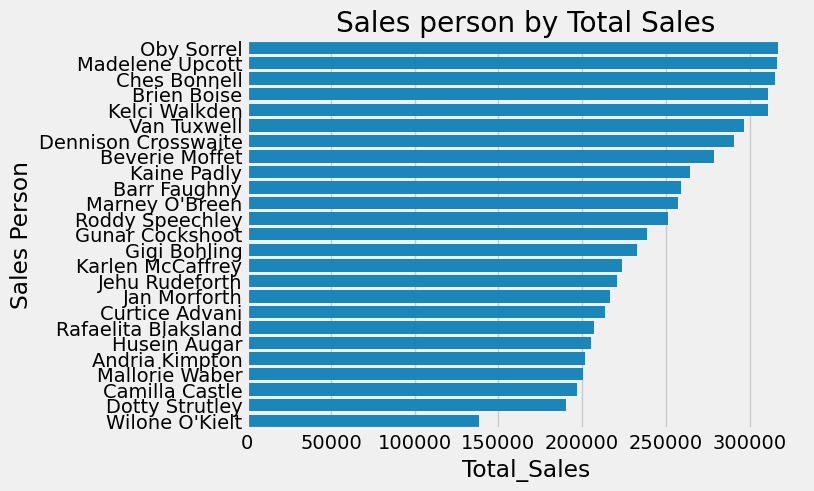

In [559]:
# Plotting Bar chart to determine which person has more sales

sns.barplot(x='Total_Sales', y='sales_person', data=df_sorted_sales_person)
plt.xlabel('Total_Sales')
plt.ylabel('Sales Person')
plt.title('Sales person by Total Sales')
plt.show()

## 3. Data prep for regression analysis

In [560]:
# Creating a scatterplot using matplotlib for a look at how the chosen variables plot against each other.

df.plot(x = 'amount', y='boxes_shipped',style='o')  # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of boxes shipped Vs amount')
plt.xlabel('Amount')
plt.ylabel('Number of boxes shipped')

Text(0, 0.5, 'Number of boxes shipped')

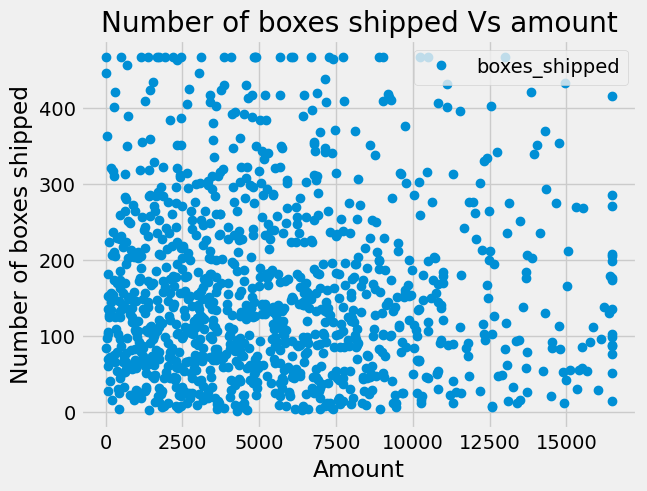

In [561]:
plt.show()

In [562]:
# Reshaping the variables into NumPy arrays and putting them into separate objects before conducting regression analysis.

X = df['amount'].values.reshape(-1,1)
y = df['boxes_shipped'].values.reshape(-1,1)

In [563]:
X

array([[5320.],
       [7896.],
       [4501.],
       ...,
       [ 574.],
       [2086.],
       [5075.]])

In [564]:
y

array([[180.],
       [ 94.],
       [ 91.],
       ...,
       [217.],
       [384.],
       [344.]])

In [668]:
# Splitting data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

# test_size=0.3 argument indicates 30% of data should be used for testing and 70% for training

## 4- Regression analysis

In [669]:
# Creating a regression analysis object

regression = LinearRegression() # This is the regression object, which will be fit onto the training set

In [670]:
# Fitting the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [671]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

In [672]:
# Creating a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='grey', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of shipped boxes Vs Amount (Test set)')
plot_test.xlabel('Amount')
plot_test.ylabel('Shipped boxes')

Text(0, 0.5, 'Shipped boxes')

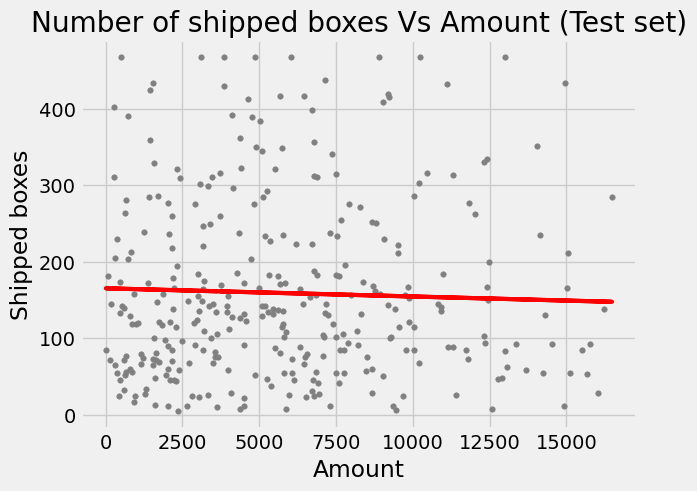

In [673]:
plt.show()

In [674]:
# Creating objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score

In [675]:
# Printing the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00106826]]
Mean squared error:  13850.063319049566
R2 score:  -0.004066377434698287


In [676]:
y_predicted

array([[161.31320921],
       [163.01815373],
       [150.5825277 ],
       [163.56403509],
       [158.32207848],
       [160.90192874],
       [161.9787358 ],
       [157.94818714],
       [155.93665172],
       [157.86593104],
       [161.32816487],
       [162.90598633],
       [160.37848086],
       [163.43691204],
       [154.28405199],
       [164.43146301],
       [156.25072044],
       [155.3459034 ],
       [159.66808731],
       [156.33297654],
       [157.64159624],
       [159.59330904],
       [160.51308174],
       [155.8469178 ],
       [155.3758147 ],
       [163.04806504],
       [158.7184033 ],
       [153.30445667],
       [163.82575903],
       [163.20509941],
       [152.04818176],
       [159.86998863],
       [149.99177938],
       [158.44172371],
       [161.89647971],
       [162.86111937],
       [149.92447894],
       [161.47024358],
       [164.32677343],
       [161.64971142],
       [158.94273811],
       [153.52879148],
       [154.69533246],
       [160

In [677]:
# Creating a dataframe to compare the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'predicted': y_predicted.flatten()})
data.head(30)

,Actual,predicted
0,106.000,161.313209
1,90.000,163.018154
2,58.000,150.582528
3,434.000,163.564035
4,145.000,158.322078
5,112.000,160.901929
6,184.000,161.978736
7,25.000,157.948187
8,60.000,155.936652
9,183.000,157.865931


#### Comparing how the regression fits the training set

In [678]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting the X_train

In [679]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [680]:
print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ',r2)
      

Slope: [[-0.00106826]]
Mean squared error:  13443.966886195165
R2 score:  0.0013749282065944612


In [681]:
# Visualizing the training set results

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of shipped boxes Vs Amount (Train set)')
plot_test.xlabel('Amount')
plot_test.ylabel('Number of shipped boxes')

Text(0, 0.5, 'Number of shipped boxes')

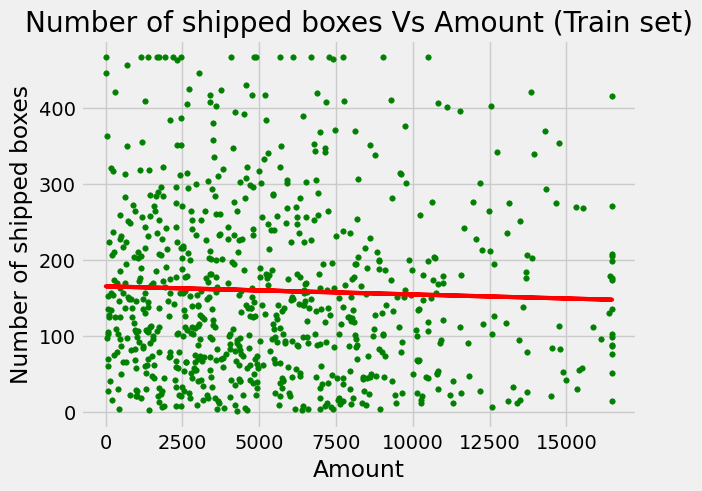

In [682]:
plt.show()

#### Interpretation

1. The slope is very close to zero, meaning the independent variable (amount) has almost no effect on the dependent variable ( Number of shipped boxes). The negative sign suggests a very weak inverse relationship, but the impact is negligible.
2. A high MSE of 13,443.97 suggests that the model's predictions deviate significantly from actual values, as can be seen in the comparison table above. This indicates very poor predictive performance. Such a large value generally signals a poorly fitting model.
3. R² Score value of 0.0014 means that only 0.14% of the variance in the dependent variable is explained by the model. This is an extremely low value, suggesting that the independent variable has almost no explanatory power.

## 5. The elbow technique

In [683]:
k_values = range(1, 10) # This defines the range of potential clusters in the data
kmeans = [KMeans(n_clusters=i, random_state=42) for i in k_values] # This defines the k-means clusters in the range assigned above

In [684]:
# Selecting only the necessary columns

columns = ['country',	
            'date',
            'amount',	
            'boxes_shipped']

In [685]:
df_sub = df[columns]

df_sub

,country,date,amount,boxes_shipped
0,United Kingdom,2022-01-04,5320.0,180.0
1,India,2022-08-01,7896.0,94.0
2,India,2022-07-07,4501.0,91.0
3,Australia,2022-04-27,12726.0,342.0
4,United Kingdom,2022-02-24,13685.0,184.0
...,...,...,...,...
1089,Australia,2022-05-17,4410.0,323.0
1090,United States of America,2022-06-07,6559.0,119.0
1091,Canada,2022-07-26,574.0,217.0
1092,India,2022-07-28,2086.0,384.0


In [686]:
# Before creating a cluster, i will have to convert the countries to a numerical value using ONE-HOT ENCODING

df_sub_encoded = pd.get_dummies(df_sub, columns = ['country'])

In [687]:
df_sub_encoded

,date,amount,boxes_shipped,country_Australia,country_Canada,country_India,country_New Zealand,country_United Kingdom,country_United States of America
0,2022-01-04,5320.0,180.0,False,False,False,False,True,False
1,2022-08-01,7896.0,94.0,False,False,True,False,False,False
2,2022-07-07,4501.0,91.0,False,False,True,False,False,False
3,2022-04-27,12726.0,342.0,True,False,False,False,False,False
4,2022-02-24,13685.0,184.0,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
1089,2022-05-17,4410.0,323.0,True,False,False,False,False,False
1090,2022-06-07,6559.0,119.0,False,False,False,False,False,True
1091,2022-07-26,574.0,217.0,False,True,False,False,False,False
1092,2022-07-28,2086.0,384.0,False,False,True,False,False,False


In [688]:
df_sub_encoded.isnull().sum()

date                                0
amount                              0
boxes_shipped                       0
country_Australia                   0
country_Canada                      0
country_India                       0
country_New Zealand                 0
country_United Kingdom              0
country_United States of America    0
dtype: int64

In [689]:
# Converting "date" to integer format

df_sub_encoded["numeric_date"] = df_sub_encoded["date"].dt.strftime("%Y%m%d").astype(int)
df_sub_encoded

,date,amount,boxes_shipped,country_Australia,country_Canada,country_India,country_New Zealand,country_United Kingdom,country_United States of America,numeric_date
0,2022-01-04,5320.0,180.0,False,False,False,False,True,False,20220104
1,2022-08-01,7896.0,94.0,False,False,True,False,False,False,20220801
2,2022-07-07,4501.0,91.0,False,False,True,False,False,False,20220707
3,2022-04-27,12726.0,342.0,True,False,False,False,False,False,20220427
4,2022-02-24,13685.0,184.0,False,False,False,False,True,False,20220224
...,...,...,...,...,...,...,...,...,...,...
1089,2022-05-17,4410.0,323.0,True,False,False,False,False,False,20220517
1090,2022-06-07,6559.0,119.0,False,False,False,False,False,True,20220607
1091,2022-07-26,574.0,217.0,False,True,False,False,False,False,20220726
1092,2022-07-28,2086.0,384.0,False,False,True,False,False,False,20220728


In [690]:
# Dropping the original date column

df_sub_encoded = df_sub_encoded.drop(columns=["date"])

In [691]:
#Reordering the columns

col = df_sub_encoded.pop("numeric_date") # Remove column
df_sub_encoded.insert(0, "numeric_date", col) # Insert at index 0

In [692]:
df_sub_encoded.head()

,numeric_date,amount,boxes_shipped,country_Australia,country_Canada,country_India,country_New Zealand,country_United Kingdom,country_United States of America
0,20220104,5320.0,180.0,False,False,False,False,True,False
1,20220801,7896.0,94.0,False,False,True,False,False,False
2,20220707,4501.0,91.0,False,False,True,False,False,False
3,20220427,12726.0,342.0,True,False,False,False,False,False
4,20220224,13685.0,184.0,False,False,False,False,True,False


In [693]:
# Converting state values (True/False) to binary (1/0)

df_sub_encoded = df_sub_encoded.astype(int)

In [694]:
df_sub_encoded.head()

,numeric_date,amount,boxes_shipped,country_Australia,country_Canada,country_India,country_New Zealand,country_United Kingdom,country_United States of America
0,20220104,5320,180,0,0,0,0,1,0
1,20220801,7896,94,0,0,1,0,0,0
2,20220707,4501,91,0,0,1,0,0,0
3,20220427,12726,342,1,0,0,0,0,0
4,20220224,13685,184,0,0,0,0,1,0


In [695]:
df_sub_encoded = df_sub_encoded.rename(columns={"country_Australia": "Australia", 
                                                "country_Canada": "Canada", 
                                                "country_India": "India", 
                                                "country_New Zealand": "New Zealand", 
                                                "country_United Kingdom":  "United Kingdom", 
                                                "country_United States of America": "United States of America"})

In [696]:
df_sub_encoded.head()

,numeric_date,amount,boxes_shipped,Australia,Canada,India,New Zealand,United Kingdom,United States of America
0,20220104,5320,180,0,0,0,0,1,0
1,20220801,7896,94,0,0,1,0,0,0
2,20220707,4501,91,0,0,1,0,0,0
3,20220427,12726,342,1,0,0,0,0,0
4,20220224,13685,184,0,0,0,0,1,0


In [697]:
scores = [model.fit(df_sub_encoded).score(df_sub_encoded) for model in kmeans] # Creates a score that represents
# a rate of variation for the given cluster option

In [698]:
scores

[-17727849456.432358,
 -5614232963.846779,
 -2574431842.5424237,
 -1498081983.4993725,
 -963319667.4330506,
 -709753804.5168214,
 -531706344.1291039,
 -418829041.07321316,
 -345464384.7914781]

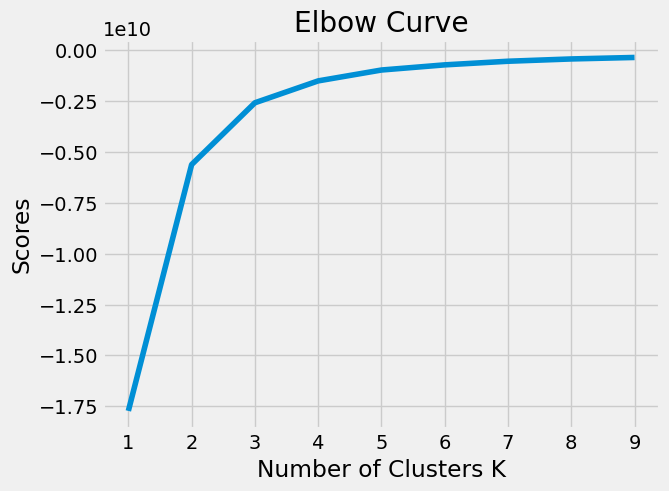

In [699]:
# Plotting the elbow curve using pylab

pl.plot(k_values,scores)
pl.xlabel('Number of Clusters K')
pl.ylabel('Scores')
pl.title('Elbow Curve')
pl.show()

##### Around K = 4 or K = 5 the curve starts to flatten out . This means the optimal count for our clusters is 4 or 5. 

## 6. K-means Clustering

In [705]:
# Creating the k-means object

kmeans = KMeans(n_clusters = 4)

In [706]:
df_sub_encoded['clusters'] = kmeans.fit_predict(df_sub_encoded)

In [707]:
df_sub_encoded['clusters'].value_counts()

clusters
2    430
0    335
3    225
1    104
Name: count, dtype: int64

In [708]:
df_sub_encoded.head()

,numeric_date,amount,boxes_shipped,Australia,Canada,India,New Zealand,United Kingdom,United States of America,clusters
0,20220104,5320,180,0,0,0,0,1,0,0
1,20220801,7896,94,0,0,1,0,0,0,3
2,20220707,4501,91,0,0,1,0,0,0,0
3,20220427,12726,342,1,0,0,0,0,0,1
4,20220224,13685,184,0,0,0,0,1,0,1


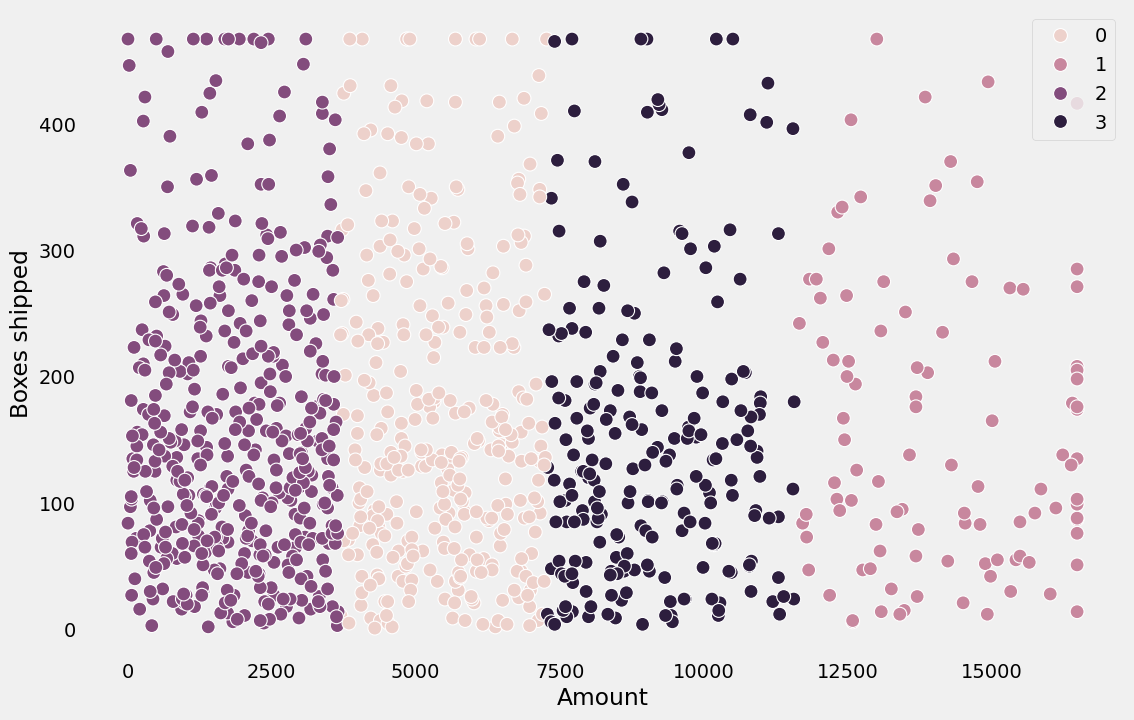

In [709]:
# Plotting the clusters for the "amount" and "boxes_shipped" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['amount'], y=df['boxes_shipped'], hue=kmeans.labels_, s=100)
# Here, we are subsetting 'X' for the x and y arguments to avoid using their labels
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm
# `s` represents the size of the points we want to see in the plot

ax.grid(False) # This removes the grid from the background
plt.xlabel('Amount') # Label X-axis.
plt.ylabel('Boxes shipped') # label y-axis.
plt.show()

In [710]:
df_sub_encoded.loc[df_sub_encoded['clusters'] == 3, 'cluster'] = 'dark'
df_sub_encoded.loc[df_sub_encoded['clusters'] == 2, 'cluster'] = 'dark purple'
df_sub_encoded.loc[df_sub_encoded['clusters'] == 1, 'cluster'] = 'dark pink'
df_sub_encoded.loc[df_sub_encoded['clusters'] == 0, 'cluster'] = 'pink'

In [711]:
df_sub_encoded.groupby('cluster').agg({'amount':['mean', 'median'],
                           'boxes_shipped':['mean', 'median']})

amount          boxes_shipped       
                     mean   median          mean median
cluster                                                
dark          9091.040000   8939.0    150.133333  127.0
dark pink    14115.442308  13867.0    159.173077  128.0
dark purple   1881.258140   1865.5    158.388372  135.0
pink          5466.122388   5460.0    169.489552  140.0

## Preparation: Time-series analysis

#### Detecting Missing Dates 
##### Checking if there are gaps or inconsistent frequency in the date sequence since this is crucial for time series decomposition analysis

In [712]:
# Creating a subset for Time series analysis
# Selecting only the necessary columns

columns_2 = ['date',	
            'amount',	
            'boxes_shipped']

In [713]:
df_sub_2 = df_sub[columns_2]

In [714]:
df_sub_2

,date,amount,boxes_shipped
0,2022-01-04,5320.0,180.0
1,2022-08-01,7896.0,94.0
2,2022-07-07,4501.0,91.0
3,2022-04-27,12726.0,342.0
4,2022-02-24,13685.0,184.0
...,...,...,...
1089,2022-05-17,4410.0,323.0
1090,2022-06-07,6559.0,119.0
1091,2022-07-26,574.0,217.0
1092,2022-07-28,2086.0,384.0


In [715]:
# Setting the "Date" column as the index

from datetime import datetime

df_sub_2['datetime'] = pd.to_datetime(df_sub_2['date']) # Create a datetime column from "Date.""
df_sub_2 = df_sub_2.set_index('datetime') # Set the datetime as the index of the dataframe.
df_sub_2.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
df_sub_2.head()

,amount,boxes_shipped
datetime,,
2022-01-04,5320.0,180.0
2022-08-01,7896.0,94.0
2022-07-07,4501.0,91.0
2022-04-27,12726.0,342.0
2022-02-24,13685.0,184.0


In [716]:
# Aggregating by date to get sum of 'Amount' and 'Boxes Shipped'
df_sub_2_agg = df_sub_2.groupby(df_sub_2.index).sum()

# Create a complete date range
full_date_range = pd.date_range(start=df_sub_2_agg.index.min(), end=df_sub_2_agg.index.max())

# Reindex to include missing dates and fill with 0
df_sub_2_agg = df_sub_2_agg.reindex(full_date_range, fill_value=0)

# Display summary of missing values after reindexing
df_sub_2_agg.head(), df_sub_2_agg.isnull().sum()

(             amount  boxes_shipped
 2022-01-03  40425.0       1595.000
 2022-01-04  77175.0       1964.000
 2022-01-05  29162.0        485.000
 2022-01-06      0.0          0.000
 2022-01-07   8666.0        583.875,
 amount           0
 boxes_shipped    0
 dtype: int64)

In [717]:
df_sub_2_agg

,amount,boxes_shipped
2022-01-03,40425.0,1595.000
2022-01-04,77175.0,1964.000
2022-01-05,29162.0,485.000
2022-01-06,0.0,0.000
2022-01-07,8666.0,583.875
...,...,...
2022-08-27,0.0,0.000
2022-08-28,0.0,0.000
2022-08-29,0.0,0.000
2022-08-30,23072.0,374.000


In [718]:
# Plotting the new resampled data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub_2_agg)

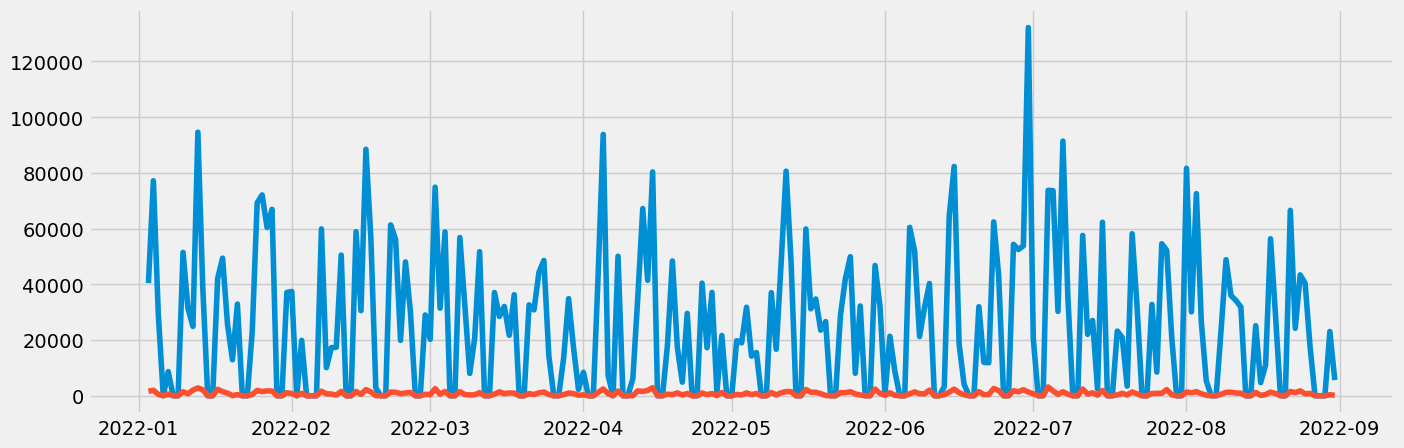

In [719]:
plt.show()

In [720]:
# Setting the index name
df_sub_2_agg.index.name = 'date'

In [721]:
df_sub_2_agg.shape

(241, 2)

In [722]:
# Resetting the index so that it becomes a column

df_ts = df_sub_2_agg.reset_index()

In [723]:
df_ts

,date,amount,boxes_shipped
0,2022-01-03,40425.0,1595.000
1,2022-01-04,77175.0,1964.000
2,2022-01-05,29162.0,485.000
3,2022-01-06,0.0,0.000
4,2022-01-07,8666.0,583.875
...,...,...,...
236,2022-08-27,0.0,0.000
237,2022-08-28,0.0,0.000
238,2022-08-29,0.0,0.000
239,2022-08-30,23072.0,374.000


#### Grouping the data weekly

In [724]:
# Smoothening out data by grouping it weekly before conducting the time series analysis
# Grouping the data weekly will avoid unneccessary variations and smoothen the data more.

df_ts.set_index('date', inplace=True)

# Group by week and aggregate sum
df_ts_weekly = df_ts.resample('W').sum()
print(df_ts_weekly)

                amount  boxes_shipped
date                                 
2022-01-09  155428.000       4627.875
2022-01-16  240895.375       9047.750
2022-01-23  162908.375       5160.875
2022-01-30  291806.375       7269.750
2022-02-06   94367.000       2685.000
2022-02-13  155117.375       4708.000
2022-02-20  237374.375       5572.000
2022-02-27  215604.375       5453.875
2022-03-06  214333.000       5455.000
2022-03-13  169873.375       3607.000
2022-03-20  155526.000       4586.750
2022-03-27  170730.000       3962.875
2022-04-03   76335.000       2642.000
2022-04-10  195678.000       6067.000
2022-04-17  230577.375       8086.750
2022-04-24  118381.375       3003.000
2022-05-01  117670.000       3370.750
2022-05-08  100233.000       2926.000
2022-05-15  230444.375       5406.875
2022-05-22  175939.750       5577.875
2022-05-29  161280.000       4516.000
2022-06-05  109354.000       4570.875
2022-06-12  205583.000       5469.750
2022-06-19  172732.000       5442.875
2022-06-26  

In [725]:
df_ts_weekly

,amount,boxes_shipped
date,,
2022-01-09,155428.000,4627.875
2022-01-16,240895.375,9047.750
2022-01-23,162908.375,5160.875
2022-01-30,291806.375,7269.750
2022-02-06,94367.000,2685.000
2022-02-13,155117.375,4708.000
2022-02-20,237374.375,5572.000
2022-02-27,215604.375,5453.875
2022-03-06,214333.000,5455.000


In [726]:
# re-plotting the new resampled data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_ts_weekly)

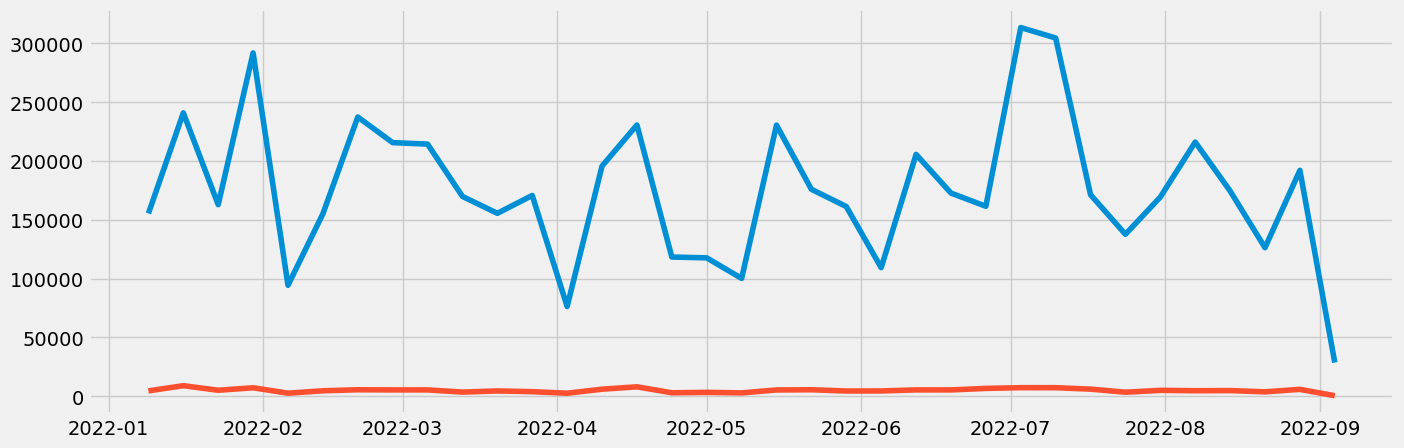

In [727]:
plt.show()

#### Observation

The graph has an almost regular trend with no unit root signaling stationarity but further test to be conducted. 

## 7. Time-series analysis: decomposition 

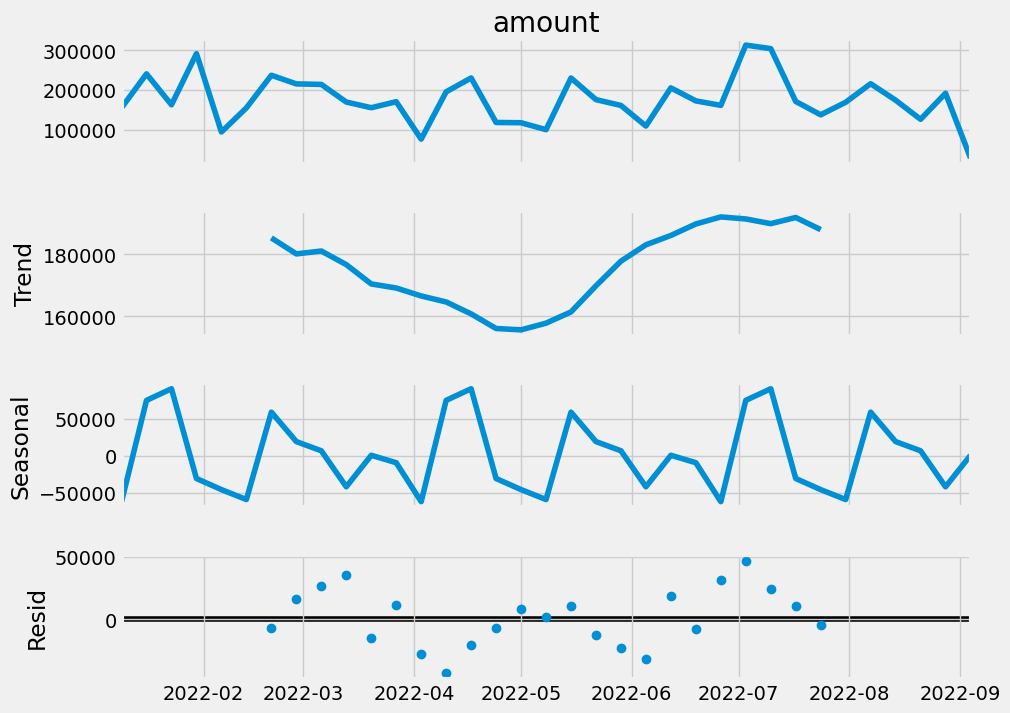

In [728]:
# Decomposing the time series using an additive model for 'amount')
ts = df_ts_weekly['amount']
decomposition = sm.tsa.seasonal_decompose(ts, model='additive', period=12)

# getting the figure object from the plot
fig = decomposition.plot()

# Adjusting the figure size in inches
fig.set_size_inches(12, 8)

plt.show()

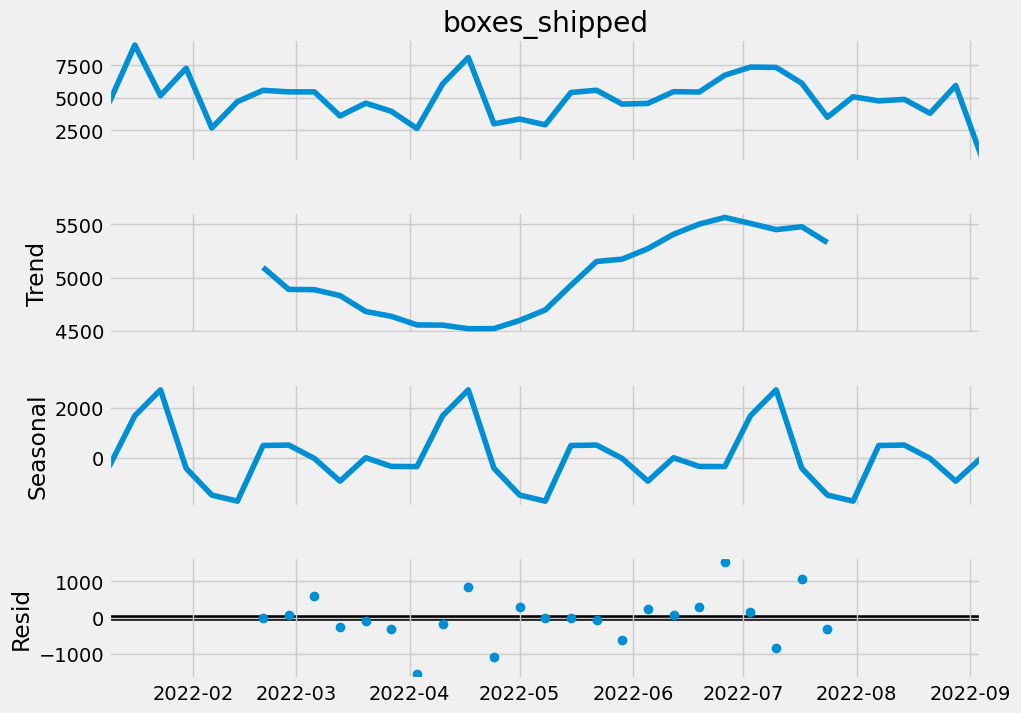

In [729]:
# Decomposing the time series using an additive model for 'boxes shipped')
ts_2 = df_ts_weekly['boxes_shipped']
decomposition = sm.tsa.seasonal_decompose(ts_2, model='additive', period=12)

# getting the figure object from the plot
fig = decomposition.plot()

# Adjusting the figure size in inches
fig.set_size_inches(12, 8)

plt.show()

#### Observation

In both plots, (amount and boxes shipped) there is no noticeable downward or upward trend suggesting stationarity but conducting the Dick-Fuller test might give a clearer picture. Seasonality  on both plots is also strong.

## 8a. Testing for stationarity

#### Establishing the null Hypothesis.

There is evidence evidence of a stationary time series since the mean or variance appears to be constant over time.

Null Hypothesis: The presence of a unit root (which will mean the data is stationary)


In [730]:
# Stationarity testing for 'AMOUNT'

# The adfuller() function will import from the model from statmodels for the test; however, running it will only return
# an array of numbers. This is why a function that prints the correct output from that array must be defined.

from statsmodels.tsa.stattools import adfuller # Imports the adfuller function

def dickey_fuller(timeseries): # Defining the function
    # performing the Dickey-fuller test:
    print ('Dickey-Fuller Stationarity test')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
        result['Critical Value (%s)'%key] = value
        print (result)

# Applying the test using the function of the time series
dickey_fuller(df_ts_weekly['amount'])

Dickey-Fuller Stationarity test
Test Statistic                 -3.669877
p-value                         0.004557
Number of Lags Used             9.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
dtype: float64
Test Statistic                 -3.669877
p-value                         0.004557
Number of Lags Used             9.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
dtype: float64
Test Statistic                 -3.669877
p-value                         0.004557
Number of Lags Used             9.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


## 8b. Testing for stationarity 

In [731]:
# Stationarity testing for 'BOXES SHIPPED'

# The adfuller() function will import from the model from statmodels for the test; however, running it will only return
# an array of numbers. This is why a function that prints the correct output from that array must be defined.

from statsmodels.tsa.stattools import adfuller # Imports the adfuller function

def dickey_fuller(timeseries): # Defining the function
    # performing the Dickey-fuller test:
    print ('Dickey-Fuller Stationarity test')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
        result['Critical Value (%s)'%key] = value
        print (result)

# Applying the test using the function of the time series
dickey_fuller(df_ts_weekly['boxes_shipped'])

Dickey-Fuller Stationarity test
Test Statistic                 -4.752864
p-value                         0.000067
Number of Lags Used             0.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
dtype: float64
Test Statistic                 -4.752864
p-value                         0.000067
Number of Lags Used             0.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
dtype: float64
Test Statistic                 -4.752864
p-value                         0.000067
Number of Lags Used             0.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


#### Interpretation of the Stationarity test
Comparing the test statistics of both 'amount' and 'boxes shipped' to the critical values of the significance levels of 5% and 10%, the null hypothesis can be rejected since the Test statistic values are larger in both instances than the critical values of the two signifance levels. This means there is NO unit root in the data which is what had been rightly predicted looking at the chart hence confirming stationarity in the data. 
Also, A “significant” result would be a p-value of less than 0.05, and clearly in these tests, the p-values are 0.00456 and 0.000067 respectively - both way lower than 0.05.

Since the data is stationary, which is supported by the results of the Dickey-Fuller test conducted above. Now, the data is ready for forecasting.

## 9. Stationarizing the Chocolate Sales Data

No need to stationarize the data since the data is already Stationary as proven by the Dickey-Fuller Test (ADF). Unnecessary differencing can harm the data.

## 10. Creating a Choropleth plot

In [732]:
from folium import Tooltip

In [733]:
# Load GeoJSON file
with open(r'C:\Users\terry\Documents\Data Analytics Course\Achievement 6\countries.geojson', encoding="utf-8") as file:
    geojson_data = json.load(file)

# Print the first feature (country)
print(json.dumps(geojson_data["features"][0]["properties"], indent=2))

{
  "name": "Afghanistan"
}


In [734]:
# Creating a Folium Map
m = folium.Map(location=[20, 0], zoom_start=2)

# Create Choropleth Map
choropleth = folium.Choropleth(
    geo_data=geojson_data,
    name="choropleth",
    data=country_sales,
    columns=["country", "amount"],
    key_on="feature.properties.name",
    fill_color="OrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Total Sales Amount",
).add_to(m)

# Adding tooltips for country and sales amount
for feature in geojson_data["features"]:
    country_name = feature["properties"]["name"]
    sales_amount = country_sales[country_sales["country"] == country_name]["amount"].sum()
    feature["properties"]["Sales"] = f"${sales_amount:,.2f}" if sales_amount > 0 else "No Data"

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(
        fields=["name", "Sales"],
        aliases=["Country: ", "Total Sales: "],
        localize=True,
        sticky=False
    )
)

# Show Map
m

## 11. Saving datasets

In [129]:
country_sales.to_csv(os.path.join(path,'Prepared Data', 'country_sales.csv'))

In [131]:
df.to_csv(os.path.join(path,'Prepared Data', 'df_chocolate_sales_cleaned.csv'))

In [735]:
df_sub_encoded.to_csv(os.path.join(path,'Prepared Data', 'df_sub_encoded.csv'))

In [737]:
df_sub_encoded.head()

,numeric_date,amount,boxes_shipped,Australia,Canada,India,New Zealand,United Kingdom,United States of America,clusters,cluster
0,20220104,5320,180,0,0,0,0,1,0,0,pink
1,20220801,7896,94,0,0,1,0,0,0,3,dark
2,20220707,4501,91,0,0,1,0,0,0,0,pink
3,20220427,12726,342,1,0,0,0,0,0,1,dark pink
4,20220224,13685,184,0,0,0,0,1,0,1,dark pink


In [738]:
# Converting numeric_date back to datetime format

df_sub_encoded['numeric_date'] = pd.to_datetime(df_sub_encoded['numeric_date'], format='%Y%m%d')

In [739]:
df_sub_encoded.head()

,numeric_date,amount,boxes_shipped,Australia,Canada,India,New Zealand,United Kingdom,United States of America,clusters,cluster
0,2022-01-04,5320,180,0,0,0,0,1,0,0,pink
1,2022-08-01,7896,94,0,0,1,0,0,0,3,dark
2,2022-07-07,4501,91,0,0,1,0,0,0,0,pink
3,2022-04-27,12726,342,1,0,0,0,0,0,1,dark pink
4,2022-02-24,13685,184,0,0,0,0,1,0,1,dark pink


In [740]:
# Converting country columns into one single categorical column

# Identifying country columns (one-hot encoded)
country_columns = ['Australia', 'Canada', 'India', 'New Zealand', 'United Kingdom', 'United States of America']

# Converting one-hot encoding to a single 'Country' column
df_sub_encoded['country'] = df_sub_encoded[country_columns].idxmax(axis=1)

# Dropping the original one-hot encoded country columns
df_sub_encoded = df_sub_encoded.drop(columns=country_columns)

In [741]:
df_sub_encoded.head()

,numeric_date,amount,boxes_shipped,clusters,cluster,country
0,2022-01-04,5320,180,0,pink,United Kingdom
1,2022-08-01,7896,94,3,dark,India
2,2022-07-07,4501,91,0,pink,India
3,2022-04-27,12726,342,1,dark pink,Australia
4,2022-02-24,13685,184,1,dark pink,United Kingdom


In [742]:
# Renaming numeric_date column to date

df_sub_encoded.rename(columns={'numeric_date': 'date'}, inplace=True)

In [743]:
df_cleaned_clusters = df_sub_encoded

In [744]:
df_cleaned_clusters.head()

,date,amount,boxes_shipped,clusters,cluster,country
0,2022-01-04,5320,180,0,pink,United Kingdom
1,2022-08-01,7896,94,3,dark,India
2,2022-07-07,4501,91,0,pink,India
3,2022-04-27,12726,342,1,dark pink,Australia
4,2022-02-24,13685,184,1,dark pink,United Kingdom


In [745]:
df_cleaned_clusters.to_csv(os.path.join(path,'Prepared Data', 'df_cleaned_clusters.csv'))